# Introduction

The primary objectives of this notebook will be:

i.  Perform exploratory data analysis (EDA) on the breast cancer dataset.

ii.  Build and train an isolation forest model to detect abnormal data points in the dataset. 

iii.  Examine various feature elimination methods and establish how they affect the performance of the isolation forest model. 

iv.  Conclusion 


In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [365]:
df=pd.read_csv('breast-cancer.csv')

In [366]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [367]:
#encode the categorical data
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

#drop the id column
df=df.drop(['id'],axis=1)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


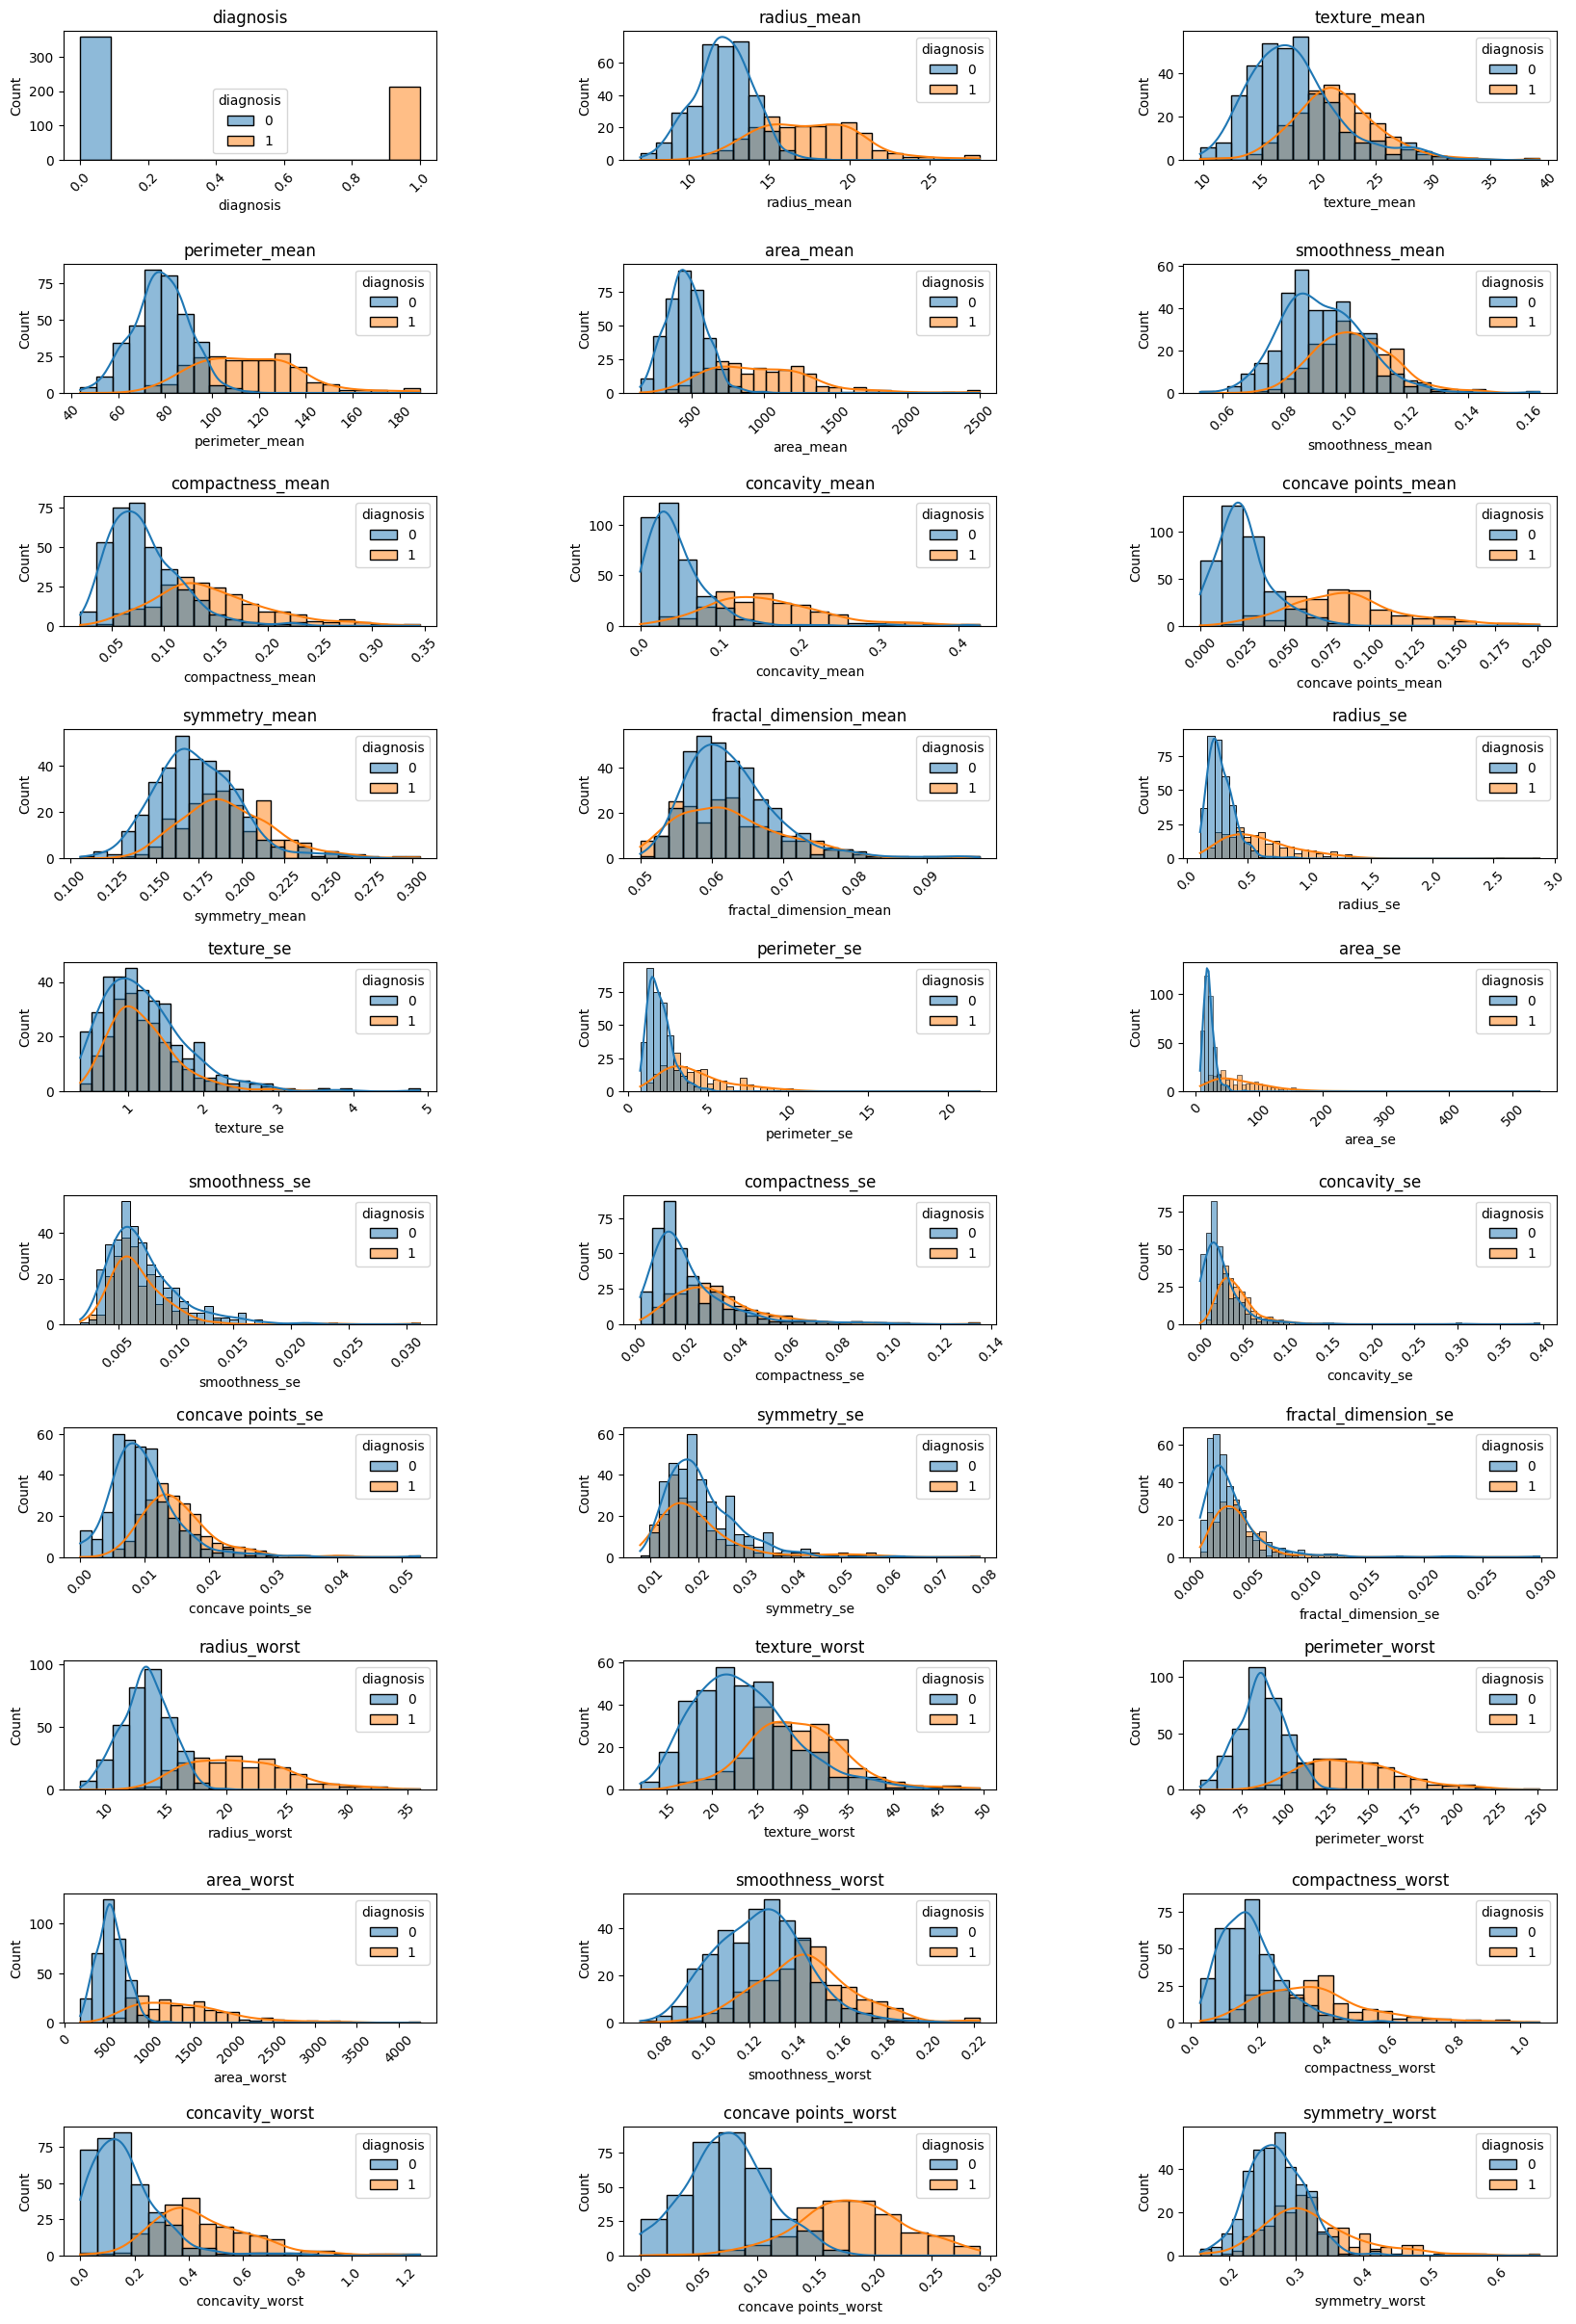

In [368]:
# assume that df is the DataFrame of features and diagnosis is the Series of class labels

# compare each feature with the diagnosis using histograms
import math

n_cols = 3
n_rows = math.ceil(len(df.columns.values[:-1]) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,30))

for idx, feat in enumerate(df.columns.values[:-1]):
    sns.histplot(data=df, x=feat, hue='diagnosis', ax=axes[idx//n_cols, idx%n_cols], kde=True)
    axes[idx//n_cols, idx%n_cols].set_title(feat, fontsize=12)
    axes[idx//n_cols, idx%n_cols].set_xticklabels(axes[idx//n_cols, idx%n_cols].get_xticklabels(), rotation=45, fontsize=10)

# add padding between subplots
fig.subplots_adjust(hspace=0.8, wspace=0.5)

plt.show()

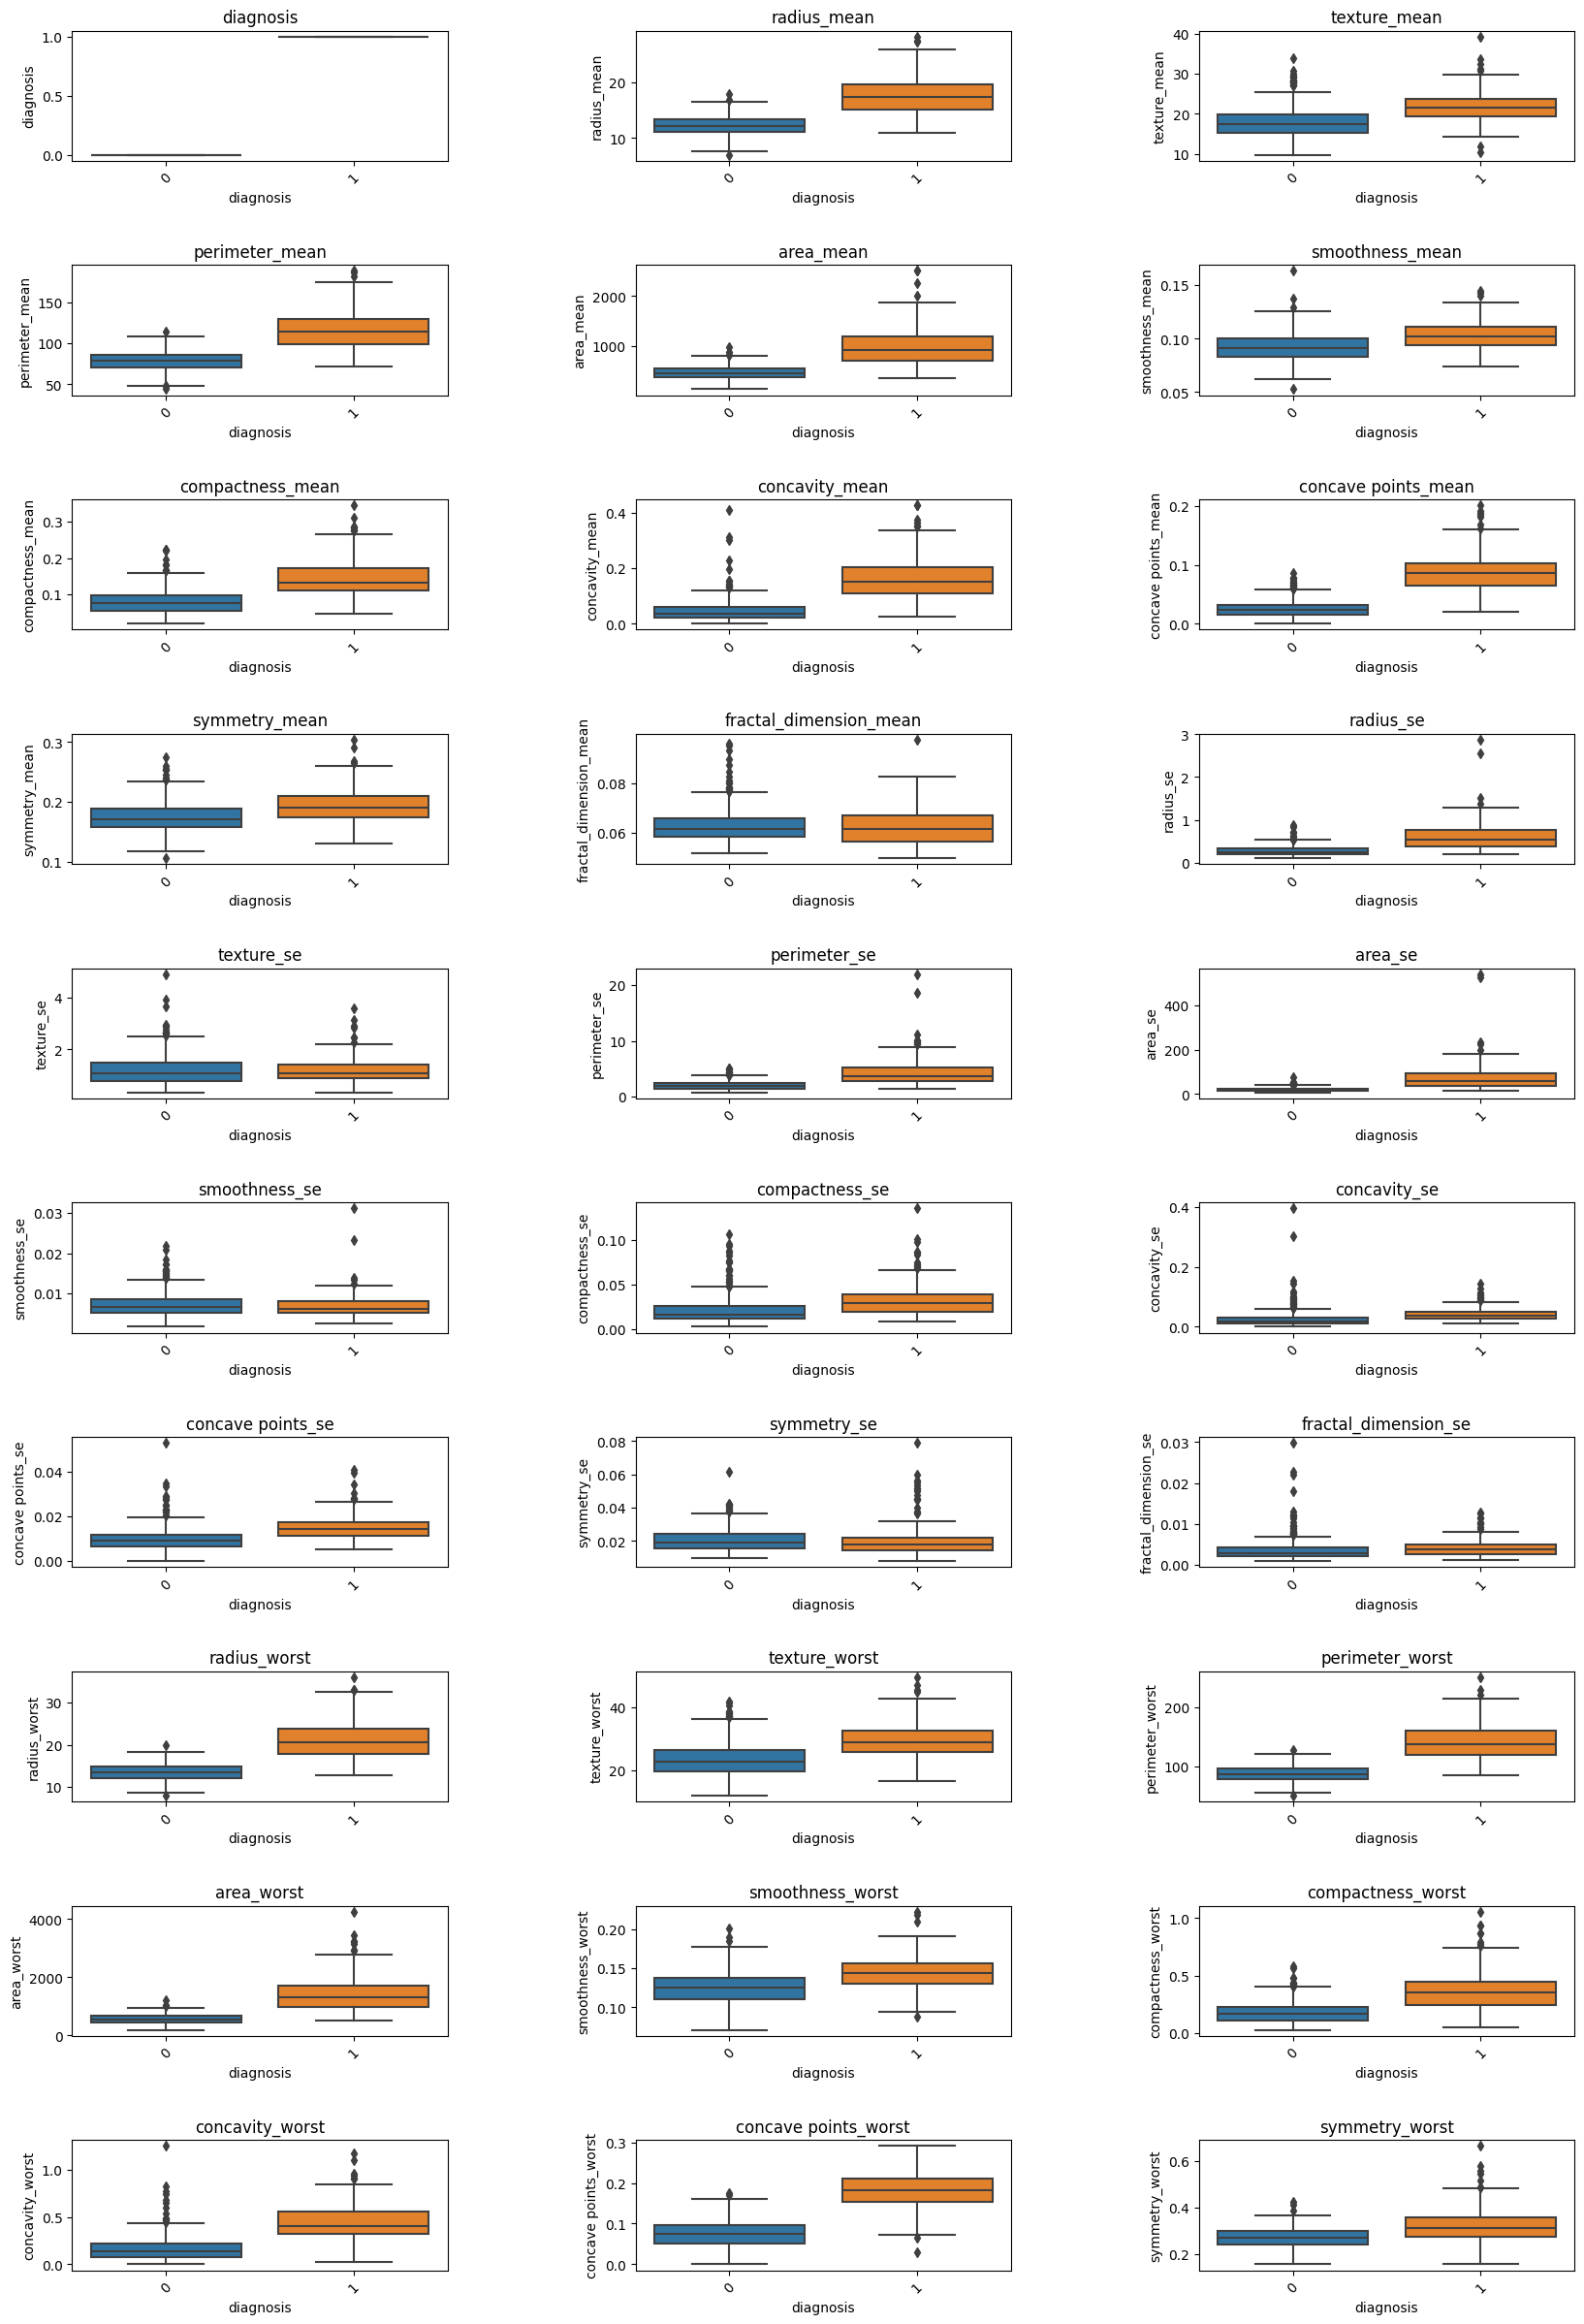

In [369]:
#use boxplots to show the distrubution of each feature

fig, axes = plt.subplots(10, 3, figsize=(20, 30))

for idx, feat in enumerate(df.columns.values[:-1]):
    sns.boxplot(data=df, x='diagnosis', y=feat, ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(feat, fontsize=12)
    axes[idx//3, idx%3].set_xticklabels(axes[idx//3, idx%3].get_xticklabels(), rotation=45, fontsize=10)

# add padding between subplots
fig.subplots_adjust(hspace=0.8, wspace=0.5)

plt.show()

In [370]:
#separate the training and testing data

y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)

In [371]:
#split the data into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [372]:
#train an isolation forest model and LOF model

#isolation forest
clf=IsolationForest(random_state=123, n_estimators=100,max_samples=float(0.25), n_jobs=-1, max_features=0.25, bootstrap=True, verbose=0 )

#LOF
clf2=LocalOutlierFactor(n_neighbors=20, n_jobs=-1)


In [373]:
#fit isolation forest
clf.fit(X_train)

#fit LOF
clf2.fit(X_train)

LocalOutlierFactor(n_jobs=-1)

In [374]:
#predict the training data on isolation forest
y_pred_train=clf.predict(X_test)

In [375]:
#print the unique values of the predictions by isolation forest
print(f'Isolation Forest: {np.unique(y_pred_train, return_counts=True)}')

Isolation Forest: (array([-1,  1]), array([ 41, 147]))


In [376]:
#map predictions to -1 and 1 for isolation forest
y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print the unique values of the predictions by isolation forest
print(f'Isolation Forest: {np.unique(y_pred_train, return_counts=True)}')

Isolation Forest: (array([0, 1]), array([147,  41]))


In [377]:

from sklearn.metrics import classification_report
#print classification report for isolation forest
print("Isolation Forest classification Report:\n\n")
print(classification_report(y_test,y_pred_train))

Isolation Forest classification Report:


              precision    recall  f1-score   support

           0       0.74      0.90      0.81       121
           1       0.71      0.43      0.54        67

    accuracy                           0.73       188
   macro avg       0.72      0.67      0.68       188
weighted avg       0.73      0.73      0.71       188



In [378]:
#model performance with scaled data
scaler=StandardScaler()
scaler.fit(X)

X_scaled=scaler.transform(X)

#split the data into test and train
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=42)

In [379]:
#train an isolation forest model
model=IsolationForest(random_state=123, n_estimators=100,max_samples=0.25, n_jobs=-1, max_features=0.25, bootstrap=True, verbose=0)
model.fit(X_train)


#predict the labels for isolation forest
y_pred_train=model.predict(X_test)

#map the predictions -1 to 1 and 1 to 0
y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print("Isolation Forest classification Report:\n\n")
print(classification_report(y_test,y_pred_train))



New labels after mapping: [0 1]
Isolation Forest classification Report:


              precision    recall  f1-score   support

           0       0.74      0.90      0.81       121
           1       0.71      0.43      0.54        67

    accuracy                           0.73       188
   macro avg       0.72      0.67      0.68       188
weighted avg       0.73      0.73      0.71       188



### Feature elimination using decision tree

In [380]:
#eliminate features using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf=DecisionTreeClassifier()
clf=clf.fit(X,y)

# #plot the feature importance
# plt.figure(figsize=(10,10))
# plt.barh(X.columns,clf.feature_importances_)
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.show()


In [381]:
#store the important featues in a dataframe
feature_imp=pd.DataFrame({'feature':X.columns,'importance':clf.feature_importances_})
feature_imp.sort_values(by='importance',ascending=False)

#eliminate features with importance less than 0.0
model=SelectFromModel(clf,threshold=0.1,prefit=True)
X_new=model.transform(X)

#split the data into test and train
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.33,random_state=42)

#train an isolation forest model
model=IsolationForest(random_state=123, n_estimators=100,max_samples=0.25, n_jobs=-1,bootstrap=False, verbose=0,max_features=0.75)

model.fit(X_train)

#predict the labels
y_pred_train=model.predict(X_test)

#map the predictions -1 to 1 and 1 to 0

y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print(classification_report(y_test,y_pred_train))


New labels after mapping: [0 1]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       121
           1       0.73      0.84      0.78        67

    accuracy                           0.83       188
   macro avg       0.81      0.83      0.82       188
weighted avg       0.84      0.83      0.83       188



## Isolation forest performance when features are eliminated using PCA

In [382]:
#feature elimination using PCA
from sklearn.decomposition import PCA

pca=PCA(0.95)
pca.fit(X_scaled)

#transform the data
X_pca=pca.transform(X)

#store the transformed data in a dataframe

X_pca=pd.DataFrame(data=X_pca)
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,793.364674,-772.386400,28.693570,114.456637,-61.498704,-56.235935,125.004209,214.007697,-373.131519,227.127904
1,831.376304,-819.573038,21.695304,113.079259,-46.296461,-52.514218,73.349616,213.724287,-449.592043,257.036272
2,751.111800,-737.924156,26.218798,98.643829,-44.035575,-47.209793,70.792005,191.885501,-398.394727,228.570366
3,271.973741,-262.394926,4.912013,14.387632,-15.271273,-15.455116,19.141196,66.112180,-141.784400,84.685196
4,741.248858,-730.596479,30.886047,110.336027,-38.163621,-43.346078,56.433840,183.125345,-408.479216,224.637216


In [383]:
X_pca.shape

(569, 10)

In [385]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [388]:
#train an isolation forest model
model=IsolationForest(random_state=123, n_estimators=100,max_samples=0.25, n_jobs=-1,bootstrap=True, verbose=0,max_features=0.75)

model.fit(X_train)

#predict the labels
y_pred_train=model.predict(X_test)

#map the predictions -1 to 1 and 1 to 0

y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print(classification_report(y_test,y_pred_train))

New labels after mapping: [0 1]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        71
           1       0.87      0.77      0.81        43

    accuracy                           0.87       114
   macro avg       0.87      0.85      0.86       114
weighted avg       0.87      0.87      0.87       114

